In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams["font.size"] = 14

import utils
import importlib
importlib.reload(utils)

import os
import sys
import subprocess

# SMAPE: best at median

SMAPE min:70.49  at 3.11
SMAPE is :70.54  at median 3.01


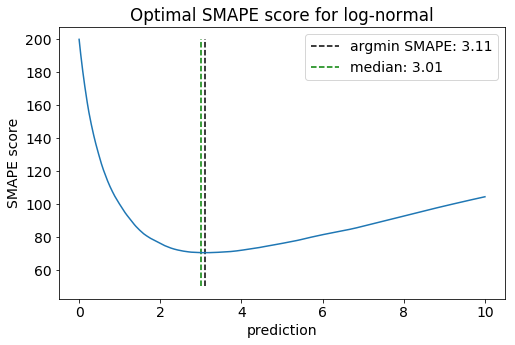

In [14]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

np.random.seed(56)
y_true = np.random.lognormal(1, 1, 100)
y_pred = np.ones(len(y_true))
x = np.linspace(0,10,1000)
res = [smape(y_true, i * y_pred) for i in x]
plt.plot(x, res)
plt.vlines(x[np.argmin(res)], 50, 200, linestyles='--', label='argmin SMAPE: '+str(round(x[np.argmin(res)], 2)))
plt.vlines(np.nanmedian(y_true), 50, 200, linestyles='--', colors='g', label='median: '+str(round(np.nanmedian(y_true), 2)))
plt.xlabel('prediction')
plt.ylabel('SMAPE score')
plt.legend()
plt.title('Optimal SMAPE score for log-normal')
print('SMAPE min:%0.2f' % np.min(res), ' at %0.2f' % x[np.argmin(res)])
print('SMAPE is :%0.2f' % smape(y_true, y_pred*np.nanmedian(y_true)), 
      ' at median %0.2f' % np.nanmedian(y_true))

# Downloading the data

In [2]:
train, test, info, index = utils.ReadData("train_big")

In [3]:
val = train.values[:, -60:]
train_for_val = train.values[:, :-60]

In [4]:
log_train_for_val = np.log1p(np.nan_to_num(train))

# Features

In [12]:
info.head()

,name,lang,site,access,agent,initial
0,2N,zh,wikipedia,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider
1,2P,zh,wikipedia,all-access,spider,2PM_zh.wikipedia.org_all-access_spider
2,3C,zh,wikipedia,all-access,spider,3C_zh.wikipedia.org_all-access_spider
3,4m,zh,wikipedia,all-access,spider,4minute_zh.wikipedia.org_all-access_spider
4,52,zh,wikipedia,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...


In [10]:
info.access.unique()

array(['all-access', 'desktop', 'mobile-web'], dtype=object)

In [11]:
info.agent.unique()

array(['spider', 'all-agents'], dtype=object)

# Distribution of data: log-normal with many zeros

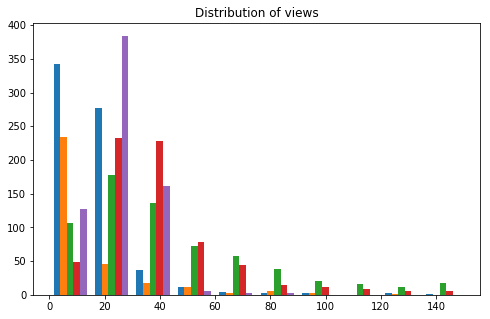

In [7]:
plt.hist(train_for_val[5:10].T, range=(0, 150))
plt.title('Distribution of views')
plt.show()

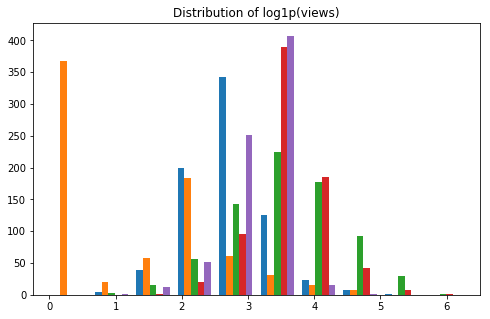

In [10]:
plt.hist(log_train_for_val[5:10].T)
plt.title('Distribution of log1p(views)')
plt.show()

In [11]:
from statsmodels.graphics.gofplots import qqplot

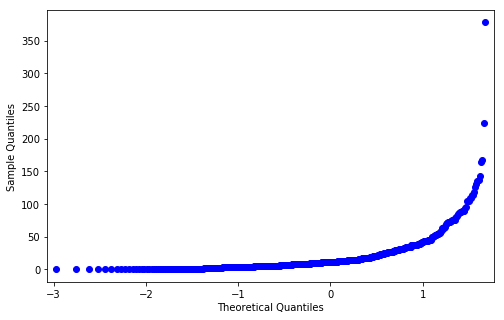

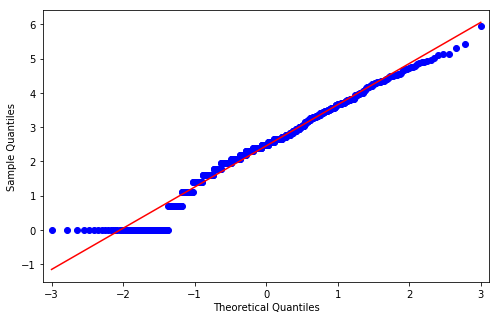

In [13]:
i = 10
s = train_for_val[i]
s_log = log_train_for_val[i]

qqplot(s, line='s')
qqplot(s_log, line='s')
plt.show()

# Examples

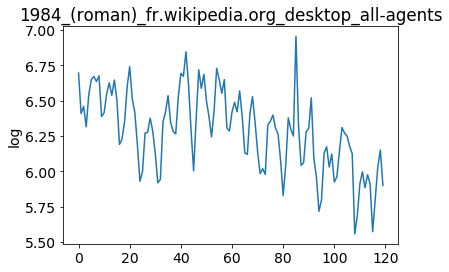

In [18]:
# seasonal
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(np.log1p(np.array(train.iloc[4311])[-120:]))
plt.title(info.iloc[4311]['initial'])
plt.ylabel('log')
plt.show()

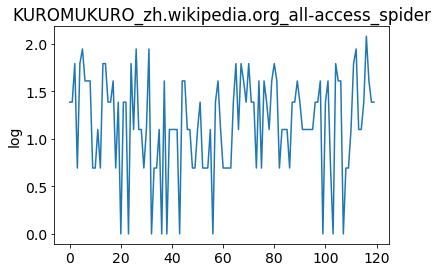

In [19]:
# many zeros

j = 83
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(np.log1p(np.array(train.iloc[j])[-120:]))
plt.title(info.iloc[j]['initial'])
plt.ylabel('log')
plt.show()

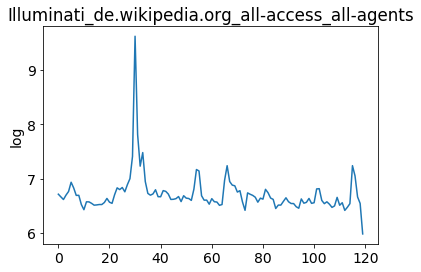

In [20]:
# random

j = 140623
plt.rcParams['figure.figsize'] = (6, 4)
plt.plot(np.log1p(np.array(train.iloc[j])[-120:]))
plt.title(info.iloc[j]['initial'])
plt.ylabel('log')
plt.show()

# Table of results

In [78]:
info = pd.read_csv("../data/google_wtts/models/info.csv", index_col="row_names").T

info.time[:6] = [i + ' seconds' for i in info.time[:6]]

In [84]:
info

row_names,SMAPE_full,SMAPE_debug,SMAPE_zeros,SMAPE_weekly,RMLSE_full,RMLSE_debug,RMLSE_zeros,RMLSE_weekly,MASE_full,MASE_debug,MASE_zeros,MASE_weekly,time,comments
nanmean_on_last_4,44.098534,45.42543,83.7153,32.6446,0.55380636,0.53508455,0.59686714,0.4483793,5.899013,1.4655813,0.61524564,1.7266963,0.009 seconds,no transformation
nanmedian_on_last_16,41.988926,43.83707,79.893036,32.814365,0.53083414,0.519535,0.5654197,0.44917005,5.7290063,1.4092616,0.5779305,1.7595501,0.04 seconds,no transformation
weighted_median_092_decay,41.123295,43.099163,80.095436,31.780184,0.52150863,0.51124924,0.5635631,0.43894243,5.6412034,1.33806,0.57532626,1.6542397,10 seconds,no transformation
last_elem,47.084824,47.784195,89.68031,33.20075,0.58512735,0.5644635,0.6525946,0.45926854,5.9110494,1.5452392,0.66476136,1.7811527,0 seconds,no transformation
median_daily_last_7_weeks,43.167763,45.236904,83.85385,33.254898,0.5425241,0.5290962,0.59278333,0.4388889,5.8820434,1.5956097,0.61150914,2.057544,1.2 seconds,no transformation
median_daily_weighted_0.8,42.019257,44.03532,83.73489,31.605772,0.5287815,0.5144787,0.59011155,0.41996613,5.7707124,1.4650066,0.6089222,1.8795114,11 seconds,no transformation
lstm_3_layers_skip_coonections,41.612988,43.491608,81.80186,32.77792,0.52981913,0.5151975,0.5789559,0.44525415,5.624676,1.3331968,0.60455793,1.6858267,-1,"1 hours, 2 gpu K 80"
medians+lstm,40.42778,42.200706,79.45347,30.822918,0.5148989,0.5011223,0.5602295,0.42434973,5.5887346,1.2838961,0.5757003,1.5867146,-1,"1 hours, 2 gpu K 80"
holt_winters,NaN,53.016304,87.6535616672039,42.27147364711762,NaN,0.65435857,0.638990854844451,0.6091672253608703,NaN,58.90393,0.6966742448043078,7.984838518887758,120 hours,no transformation
kalmam_filter,NaN,47.74657,84.44146485090256,34.713207743644716,NaN,0.5745737,0.6675444050878286,0.47663028302788735,NaN,1.3797123,0.6135616917163134,1.66205268740654,555 hours,no transformation


In [79]:
res = info[['SMAPE_full', 'SMAPE_debug', 'SMAPE_zeros', 'SMAPE_weekly']].astype(float).round(2)
res['time'] = info.time
res.columns.name = ''

In [80]:
df = pd.DataFrame([['NaN', 56.11, 96.69, 47.51, '4833 hours']], columns=res.columns)
df = df.set_index([['arima_d_0']])
res = res.append(df)

df = pd.DataFrame([['NaN', 50.36, 87.88, 36.88, '2900 hours']], columns=res.columns)
df = df.set_index([['arima_d_1']])
res = res.append(df)

In [82]:
res = res.iloc[[3, 1, 2, 9, 13, 14, 10, 11, 12, 8, 6, 7]]

In [83]:
print(res.to_latex())

\begin{tabular}{llrrrl}
\toprule
{} & SMAPE\_full &  SMAPE\_debug &  SMAPE\_zeros &  SMAPE\_weekly &          time \\
\midrule
last\_elem                                &      47.08 &        47.78 &        89.68 &         33.20 &     0 seconds \\
nanmedian\_on\_last\_16                     &      41.99 &        43.84 &        79.89 &         32.81 &  0.04 seconds \\
weighted\_median\_092\_decay                &      41.12 &        43.10 &        80.10 &         31.78 &    10 seconds \\
kalmam\_filter                            &        NaN &        47.75 &        84.44 &         34.71 &     555 hours \\
arima\_d\_0                                &        NaN &        56.11 &        96.69 &         47.51 &    4833 hours \\
arima\_d\_1                                &        NaN &        50.36 &        87.88 &         36.88 &    2900 hours \\
kalmam\_filter\_with\_seasonality\_learn\_all &        NaN &       157.38 &        86.12 &        197.38 &      60 hours \\
kalmam\_filter\_with\_s